In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nalger_helper_functions import custom_cg

In [2]:
n = 50
U, dd0, _ = np.linalg.svd(np.random.randn(n,n))
dd = np.sqrt(np.abs(dd0))

A = np.dot(U, np.dot(np.diag(dd), U.T))
b = np.random.randn(n)
x_true = np.linalg.solve(A, b)

x, info, residuals, errors, kk, xx = custom_cg(A, b, tol=1e-5,
                                               iters_to_save=[1,5,10,20,30,40],
                                               x_true=x_true)

k=0, res=0.38067377851767437, err=0.7973757637238766
k=1, res=0.2885806693948773, err=0.5692134322763194
k=2, res=0.20937961061266316, err=0.35140030097243474
k=3, res=0.14246976195810868, err=0.19020662457998733
k=4, res=0.08217161139862562, err=0.10091164175952196
k=5, res=0.04665444441006482, err=0.04466482289936712
k=6, res=0.021437574731737193, err=0.014673245815780885
k=7, res=0.007631840012232627, err=0.005600036726950606
k=8, res=0.0036056027918929495, err=0.0023181382969033643
k=9, res=0.0011330681253000773, err=0.0007039223341325614
k=10, res=0.0004320409852755823, err=0.00027851798874535235
k=11, res=0.00017255814527776157, err=0.0001026369143049374
k=12, res=4.9520500345011564e-05, err=2.6637732887897633e-05
k=13, res=1.4333919558257627e-05, err=8.848044849064723e-06
k=14, res=5.481959848646619e-06, err=3.5538991569816306e-06


Text(0.5, 1.0, 'CG convergence')

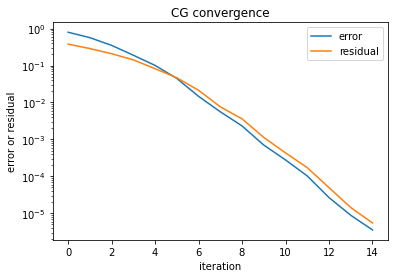

In [3]:
plt.figure()
plt.semilogy(errors)
plt.semilogy(residuals)
plt.xlabel('iteration')
plt.ylabel('error or residual')
plt.legend(['error', 'residual'])
plt.title('CG convergence')

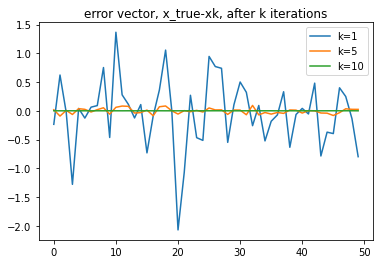

In [4]:
plt.figure()
legend_strs = list()
for i in range(len(kk)):
    k = kk[i]
    x = xx[i]
    legend_strs.append('k=' + str(k))
    plt.plot(x_true - x)

plt.title('error vector, x_true-xk, after k iterations')
plt.legend(legend_strs)

In [5]:
# Turn off display
x, info, residuals, errors, kk, xx = custom_cg(A, b, display=False,
                                               tol=1e-5,
                                               iters_to_save=[1,5,10,20,30,40],
                                               x_true=x_true)

# Don't save intermediate iterates
x, info, residuals, errors = custom_cg(A, b, display=False,
                                       tol=1e-5,
                                       x_true=x_true)

# Don't compute errors (x_true not supplied)
x, info, residuals = custom_cg(A, b, display=False, tol=1e-5)

# Don't compute residuals
x, info = custom_cg(A, b, track_residuals=False,
                    display=False, tol=1e-5)